# Enade - Transformação de dados - Parte 01

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
enade = pd.read_csv('./enade2019/microdados_enade_2019/2019/3.DADOS/microdados_enade_2019.txt', sep=';', decimal=',')

In [4]:
enade.head()

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
0,2019,1,10002,10028,5710,3,1,5103403,51,5,...,2.0,5.0,1.0,1.0,2.0,5.0,8.0,7.0,1.0,2.0
1,2019,1,10002,10028,5710,3,1,5103403,51,5,...,1.0,4.0,2.0,2.0,2.0,5.0,4.0,4.0,2.0,2.0
2,2019,1,10002,10028,5710,3,1,5103403,51,5,...,3.0,4.0,4.0,3.0,3.0,4.0,1.0,1.0,1.0,4.0
3,2019,1,10002,10028,5710,3,1,5103403,51,5,...,3.0,5.0,2.0,2.0,2.0,3.0,3.0,4.0,3.0,3.0
4,2019,1,10002,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Quantos casos nulos temos?
enade.NT_GER.isnull().sum()

43839

In [7]:
dict(enade.dtypes)

{'NU_ANO': dtype('int64'),
 'CO_IES': dtype('int64'),
 'CO_CATEGAD': dtype('int64'),
 'CO_ORGACAD': dtype('int64'),
 'CO_GRUPO': dtype('int64'),
 'CO_CURSO': dtype('int64'),
 'CO_MODALIDADE': dtype('int64'),
 'CO_MUNIC_CURSO': dtype('int64'),
 'CO_UF_CURSO': dtype('int64'),
 'CO_REGIAO_CURSO': dtype('int64'),
 'NU_IDADE': dtype('int64'),
 'TP_SEXO': dtype('O'),
 'ANO_FIM_EM': dtype('int64'),
 'ANO_IN_GRAD': dtype('float64'),
 'CO_TURNO_GRADUACAO': dtype('float64'),
 'TP_INSCRICAO_ADM': dtype('int64'),
 'TP_INSCRICAO': dtype('int64'),
 'NU_ITEM_OFG': dtype('int64'),
 'NU_ITEM_OFG_Z': dtype('int64'),
 'NU_ITEM_OFG_X': dtype('int64'),
 'NU_ITEM_OFG_N': dtype('int64'),
 'NU_ITEM_OCE': dtype('int64'),
 'NU_ITEM_OCE_Z': dtype('int64'),
 'NU_ITEM_OCE_X': dtype('int64'),
 'NU_ITEM_OCE_N': dtype('int64'),
 'DS_VT_GAB_OFG_ORIG': dtype('O'),
 'DS_VT_GAB_OFG_FIN': dtype('O'),
 'DS_VT_GAB_OCE_ORIG': dtype('O'),
 'DS_VT_GAB_OCE_FIN': dtype('O'),
 'DS_VT_ESC_OFG': dtype('O'),
 'DS_VT_ACE_OFG': dtype(

Para realizar nossas análises, vamos precisar apenas das seguintes colunas:

- CO_IES
- CO_CATEGAD
- CO_GRUPO
- CO_MODALIDADE
- CO_UF_CURSO
- CO_REGIAO_CURSO
- NU_IDADE
- TP_SEXO
- NT_GER
- NT_FG
- NT_CE
- QE_I01 (ESTADO CIVIL)
- QE_I02 (COR OU RAÇA)
- QE_I04 (ESCOLARIDADE DO PAI)
- QE_I05 (ESCOLARIDADE DA MÃE)
- QE_I08 (RENDA FAMILIAR)
- QE_I10 (SITUAÇÃO DE TRABALHO)
- QE_I11 (SITUAÇÃO DE BOLSA)
- QE_I14 (INTERCÂMBIO)
- QE_I15 (COTAS)
- QE_I23 (HORAS DE ESTUDO / SEMANA)
- QE_I25 (MOTIVO DE ESCOLHA DO CURSO)
- QE_I26 (MOTIVO DE ESCOLHA DA IES)

In [13]:
enade.loc[enade.CO_REGIAO_CURSO == 5].NT_GER.describe()

count    30769.000000
mean        44.604609
std         14.489081
min          0.000000
25%         33.900000
50%         44.500000
75%         55.300000
max         91.600000
Name: NT_GER, dtype: float64

In [30]:
enade.loc[enade.NT_GER > 0].NT_GER.describe()

count    389730.000000
mean         44.117437
std          14.486758
min           0.300000
25%          33.300000
50%          43.800000
75%          54.800000
max          93.000000
Name: NT_GER, dtype: float64

In [34]:
enade.loc[(enade.NU_IDADE > 16) &
          (enade.NU_IDADE < 41)].shape

(409543, 137)

In [36]:
enade.TP_SEXO.value_counts() / enade.shape[0]

F    0.537596
M    0.462404
Name: TP_SEXO, dtype: float64

In [39]:
enade[['NT_GER', 'NT_FG', 'NT_CE']].describe()

,NT_GER,NT_FG,NT_CE
count,390091.000000,390091.000000,390091.000000
mean,44.076610,39.837949,45.472874
std,14.542059,16.241178,16.641654
min,0.000000,0.000000,0.000000
25%,33.200000,28.500000,32.900000
50%,43.800000,39.300000,45.200000
75%,54.800000,51.300000,57.800000
max,93.000000,97.800000,100.000000


In [41]:
enade.groupby('CO_REGIAO_CURSO').agg({
    'NT_GER': 'mean',
    'NT_FG': 'mean',
    'NT_CE': 'mean'
})

,NT_GER,NT_FG,NT_CE
CO_REGIAO_CURSO,,,
1,40.282753,37.119037,41.320522
2,43.788555,40.057649,45.015455
3,44.016319,40.144793,45.290297
4,45.747187,40.082428,47.618845
5,44.604609,39.180022,46.396032


# Enade - Transformação de Dados - Parte 02

In [44]:
# Corrigindo as categorias das variáveis de questionário do estudante
enade.QE_I01.replace({
    'A': 'Solteiro',
    'B': 'Casado',
    'C': 'Separado',
    'D': 'Viúvo',
    'E': 'Outro'
}).value_counts()

Solteiro    325716
Casado       62814
             26055
Outro        10250
Separado      8424
Viúvo          671
Name: QE_I01, dtype: int64

In [49]:
enade.QE_I02.unique()

array(['C', 'A', 'D', ' ', 'B', 'F', 'E'], dtype=object)

In [51]:
enade.QE_I02.replace({
    'A': 'Branca',
    'B': 'Preta',
    'C': 'Amarela',
    'D': 'Parda',
    'E': 'Indígena',
    'F': pd.NA,
    ' ': pd.NA
}).value_counts()

Branca      220386
Parda       135770
Preta        32869
Amarela      10093
Indígena      1300
Name: QE_I02, dtype: int64

## Algumas perguntas para responder?

1. Qual é a nota geral média dos alunos da região nordeste?

2. Qual é a nota geral média dos alunos pretos do estado da Bahia?

3. Qual é a média da nota no componente específico dos alunos do Rio grande do Sul no curso de Engenharia Elétrica?

4. Qual é a média de nota do componente de formação geral de alunas do sexo feminino, pardas, de Minas gerais em cursos presenciais de Engenharia de Produção?

In [52]:
enade.loc[
    (enade.CO_REGIAO_CURSO == 2),
    'NT_GER'
].mean()

43.78855492862657

In [53]:
enade.loc[
    (enade.QE_I02 == 'B') &
    (enade.CO_UF_CURSO == 29),
    'NT_GER'
].mean()

41.27752161383287

In [58]:
enade.loc[
    (enade.CO_GRUPO == 5806) &
    (enade.CO_UF_CURSO == 43),
    'NT_CE'
].mean()

34.79692671394829

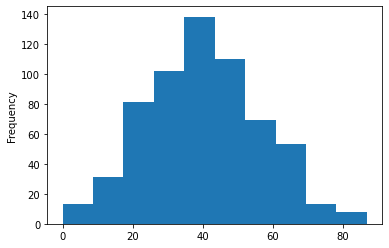

In [56]:
enade.loc[
    (enade.TP_SEXO == 'F') &
    (enade.QE_I02 == 'D') &
    (enade.CO_UF_CURSO == 31) &
    (enade.CO_GRUPO == 6208),
    'NT_FG'
].mean()